In [ ]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [ ]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/traindata'  # Update with your actual path
test_dir = '/content/drive/MyDrive/testdata'    # Update with your actual path

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/traindata/men')))
print(len(os.listdir('/content/drive/MyDrive/traindata/women')))
print(len(os.listdir('/content/drive/MyDrive/testdata/men')))
print(len(os.listdir('/content/drive/MyDrive/testdata/women')))

1000
1912
418
915


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (men vs. women)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 2313 images belonging to 2 classes.
Found 578 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [ ]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
73/73 [==============================] - 1228s 17s/step - loss: 0.7590 - accuracy: 0.6494 - val_loss: 0.6110 - val_accuracy: 0.6696
Epoch 2/30
73/73 [==============================] - 409s 6s/step - loss: 0.6066 - accuracy: 0.6835 - val_loss: 0.6457 - val_accuracy: 0.6298
Epoch 3/30
73/73 [==============================] - 416s 6s/step - loss: 0.5765 - accuracy: 0.7099 - val_loss: 0.6153 - val_accuracy: 0.6799
Epoch 4/30
73/73 [==============================] - 420s 6s/step - loss: 0.5011 - accuracy: 0.7562 - val_loss: 0.7070 - val_accuracy: 0.6886
Epoch 5/30
73/73 [==============================] - 411s 6s/step - loss: 0.4126 - accuracy: 0.7964 - val_loss: 0.7078 - val_accuracy: 0.6678
Epoch 6/30
73/73 [==============================] - 408s 6s/step - loss: 0.2757 - accuracy: 0.8755 - val_loss: 1.0365 - val_accuracy: 0.6938
Epoch 7/30
73/73 [==============================] - 409s 6s/step - loss: 0.1793 - accuracy: 0.9269 - val_loss: 1.6795 - val_accuracy: 0.6834
Epoch 8/30


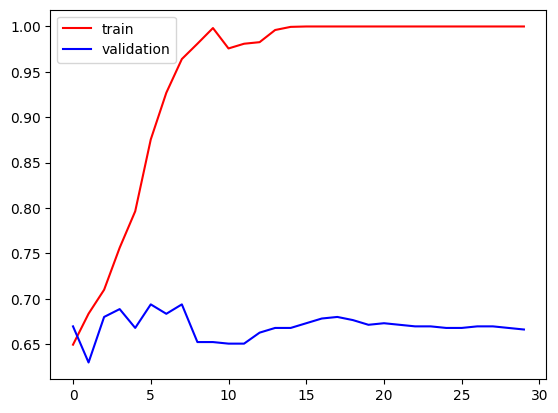

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

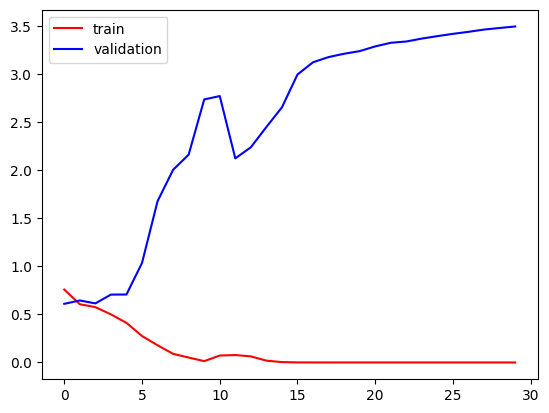

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1330 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

42/42 [==============================] - 80s 2s/step
[[1.        ]
 [0.9992945 ]
 [0.99994123]
 ...
 [1.        ]
 [0.999892  ]
 [0.02926282]]


In [ ]:
len(predictions)

1330

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 89 329]
 [191 721]]
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.21      0.26       418
           1       0.69      0.79      0.73       912

    accuracy                           0.61      1330
   macro avg       0.50      0.50      0.49      1330
weighted avg       0.57      0.61      0.58      1330

